In [4]:
import pandas as pd
import numpy as np
import json

with open('./data sets/Indian_stock_data.json', 'r') as file:
    data = json.load(file)

    df = pd.DataFrame(data)

In [5]:
list(df)

['NAME',
 'TYPE',
 'COST',
 'STRENGTH',
 'WEAKNESS',
 'OPPORTUNITIES',
 'THREATS',
 'P_LOW',
 'P_HIGH',
 'YEARLY_LOW',
 'YEARLY_HIGH']

In [6]:
df.isnull().sum()

NAME                0
TYPE             3289
COST             4320
STRENGTH            0
WEAKNESS            0
OPPORTUNITIES       0
THREATS             0
P_LOW            3246
P_HIGH           3246
YEARLY_LOW       3297
YEARLY_HIGH      3297
dtype: int64

In [7]:
df.shape # 9543 stocks - alot seems to have a null values, yet its less than half, so lets remove them

(9543, 11)

In [8]:
df = df.dropna()
df.shape #We dropped null values, and looked how many stocks are left (5112)

(5112, 11)

In [9]:
#lets see if anything is still null:
df.isnull().sum()

NAME             0
TYPE             0
COST             0
STRENGTH         0
WEAKNESS         0
OPPORTUNITIES    0
THREATS          0
P_LOW            0
P_HIGH           0
YEARLY_LOW       0
YEARLY_HIGH      0
dtype: int64

In [10]:
df.describe() #tells us the prices of stocks in india.

,COST
count,5112.000000
mean,133.655219
std,209.258050
min,0.000000
25%,5.195000
50%,34.900000
75%,161.137500
max,999.990000


In [11]:
#lets check what stock costs the most money - according to the table above its 999.99 rupee, as all the cost is in local currency
Company = df[df['COST'] == 999.99]
print(Company)

                NAME TYPE    COST           STRENGTH          WEAKNESS  \
7594  DSP Liquid ETF  ETF  999.99  Near 52 Week High  Near 52 Week Low   

                      OPPORTUNITIES                   THREATS   P_LOW  \
7594  No Opportunity for this stock  No Threat for this stock  999.99   

       P_HIGH YEARLY_LOW YEARLY_HIGH  
7594  1000.01     995.30     1045.00  


In [12]:
df.sample(5)

,NAME,TYPE,COST,STRENGTH,WEAKNESS,OPPORTUNITIES,THREATS,P_LOW,P_HIGH,YEARLY_LOW,YEARLY_HIGH
7124,Geetanjali Credit and Capital Ltd.,Finance - NBFC,2.59,"Strong Momentum: Price above short, medium and...",Degrowth in Revenue and Profit,Stock with Low PE (PE < = 10),No Threat for this stock,2.59,2.59,0.92,4.29
9142,Andhra Petro Ltd.,Commodity Chemicals,103.83,"Strong Momentum: Price above short, medium and...",Degrowth in Revenue and Profit,Positive Breakout Third Resistance ( LTP > R3),No Threat for this stock,97.75,105.90,46.00,105.90
261,Fundviser Capital (india) Ltd.,Dyes & Pigments,0.00,Company with No Debt,Negative Breakdown Second Support (LTP < S2),Highest Recovery from 52 Week Low,No Threat for this stock,56.50,56.50,8.52,80.08
5861,Kamadgiri Fashion Ltd.,Textiles & Apparel,75.05,Effectively using its capital to generate prof...,Degrowth in Revenue and Profit,Stock with Low PE (PE < = 10),No Threat for this stock,73.10,77.75,56.10,138.95
7343,Facor Alloys Ltd.,Ferro Manganese,10.36,"Strong Momentum: Price above short, medium and...",Decline in Quarterly Net Profit with falling P...,Positive Breakout Second Resistance ( LTP > R2),No Threat for this stock,9.90,10.55,6.00,12.25


In [13]:
print(df.head())

                          NAME                  TYPE    COST  \
0            A & M Febcon Ltd.         Miscellaneous    0.95   
1         A F Enterprises Ltd.  Finance - Investment    5.55   
4             A K Spintex Ltd.    Textiles & Apparel  138.00   
5  A2Z Infra Engineering  Ltd.        Infrastructure   13.81   
8        AAA Technologies Ltd.              Software   97.65   

                                            STRENGTH  \
0                  Company with Zero Promoter Pledge   
1  Growth in Net Profit with increasing Profit Ma...   
4  Strong Momentum: Price above short, medium and...   
5  Strong Momentum: Price above short, medium and...   
8  Strong Momentum: Price above short, medium and...   

                                            WEAKNESS  \
0  Low Piotroski Score : Companies with weak fina...   
1  Inefficient use of shareholder funds - ROE dec...   
4  Decline in Net Profit with falling Profit Marg...   
5  Inefficient use of shareholder funds - ROE dec...  

In [14]:
#lets see if there are any stocks, with a level of Threat that isnt labeled as: "No Threat for this stock"
Result = df[df['THREATS'] != "No Threat for this stock"]
print(Result)

                                 NAME                      TYPE    COST  \
19          Abhishek Corporation Ltd.        Textiles & Apparel    0.57   
85              Aviva Industries Ltd.                   Trading   26.42   
108          Budge Budge Company Ltd.             Miscellaneous   12.12   
157   Cubical Financial Services Ltd.            Finance - NBFC    1.99   
194                Duke Offshore Ltd.  Transport Infrastructure   10.92   
...                               ...                       ...     ...   
9177           Amrit Corporation Ltd.             Consumer Food  937.95   
9255             Alok Industries Ltd.        Textiles & Apparel   31.73   
9279             Alka Securities Ltd.   Finance - Stock Broking    0.89   
9354   AGS Transact Technologies Ltd.           Online Services  117.70   
9396             Adroit Infotech Ltd.  IT Services & Consulting   20.34   

                                               STRENGTH  \
19    Rising Net Cash Flow and Cash from

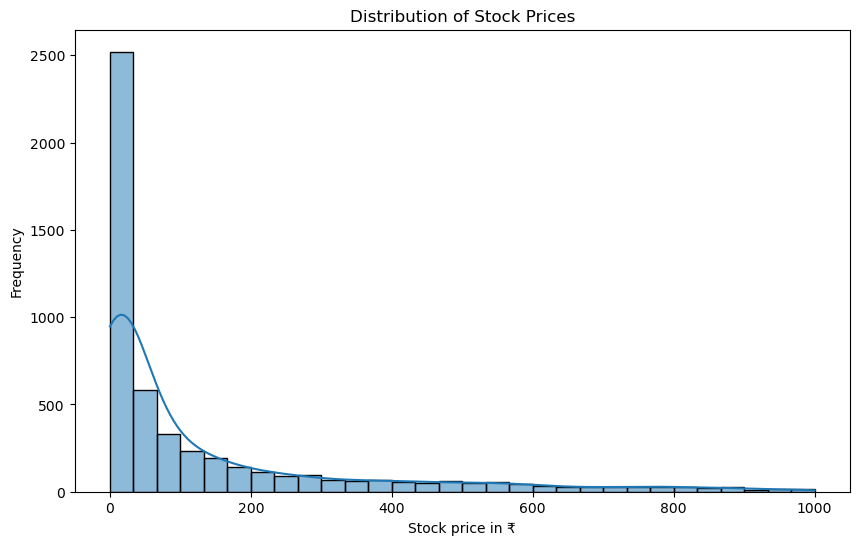

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='COST', bins=30, kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock price in ₹')
plt.ylabel('Frequency')
plt.show()
